# Módulo 07 - Tarefa 02

#### 1) Carregue a base e garanta que a base está como deveria.

Considere a base que você ajustou na lição passada. Carregue-a. Caso ainda haja alguma pendência, ajuste - lembre-se de que o scikitlearn não recebe variáveis em formato string, somente numéricas, e não aceita '*missings*'. 

- Separe 70% da base para treinamento e 30% para validação. Cada uma dessas partes terá dois objetos, um armazenando a variável resposta ```mau```e outro armazenando as variáveis explicativas (lembrando: sem variáveis string, já com as dummies).

In [20]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [2]:
data = pd.read_csv('data_final.csv', sep=';', decimal=',')
data.head()

,sexo,qtd_filhos,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,mau,...,educacao_Secondary / secondary special,estado_civil_Married,estado_civil_Separated,estado_civil_Single / not married,estado_civil_Widow,tipo_residencia_House / apartment,tipo_residencia_Municipal apartment,tipo_residencia_Office apartment,tipo_residencia_Rented apartment,tipo_residencia_With parents
0,0,0,58.832877,3.106849,1,0,0,0,2.0,0,...,1,1,0,0,0,1,0,0,0,0
1,1,0,52.356164,8.358904,1,0,1,1,1.0,0,...,1,0,0,1,0,1,0,0,0,0
2,1,0,52.356164,8.358904,1,0,1,1,1.0,0,...,1,0,0,1,0,1,0,0,0,0
3,0,0,46.224658,2.106849,1,1,1,1,2.0,0,...,0,1,0,0,0,1,0,0,0,0
4,1,0,29.230137,3.021918,1,0,0,0,2.0,0,...,0,1,0,0,0,1,0,0,0,0


In [3]:
data.dtypes
# todas as colunas com variáveis em formato numérico

sexo                                        int64
qtd_filhos                                  int64
idade                                     float64
tempo_emprego                             float64
possui_celular                              int64
possui_fone_comercial                       int64
possui_fone                                 int64
possui_email                                int64
qt_pessoas_residencia                     float64
mau                                         int64
posse_de_veiculo_Y                          int64
posse_de_imovel_Y                           int64
tipo_renda_Pensioner                        int64
tipo_renda_State servant                    int64
tipo_renda_Student                          int64
tipo_renda_Working                          int64
educacao_Higher education                   int64
educacao_Incomplete higher                  int64
educacao_Lower secondary                    int64
educacao_Secondary / secondary special      int64


In [4]:
data.isna().sum()
# não há dados faltantes

sexo                                      0
qtd_filhos                                0
idade                                     0
tempo_emprego                             0
possui_celular                            0
possui_fone_comercial                     0
possui_fone                               0
possui_email                              0
qt_pessoas_residencia                     0
mau                                       0
posse_de_veiculo_Y                        0
posse_de_imovel_Y                         0
tipo_renda_Pensioner                      0
tipo_renda_State servant                  0
tipo_renda_Student                        0
tipo_renda_Working                        0
educacao_Higher education                 0
educacao_Incomplete higher                0
educacao_Lower secondary                  0
educacao_Secondary / secondary special    0
estado_civil_Married                      0
estado_civil_Separated                    0
estado_civil_Single / not marrie

In [7]:
# separar viáveis - target e explicativas
y = data.mau
X = data.drop('mau', axis=1)

In [18]:
# separar linhas para treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

#### 2) Vamos para o modelo:

1. Defina um objeto com a função da árvore de decisão vista em aula.
2. Treine o modelo com os dados que você separou para treinamento.
3. Visualize a árvore. Talvez você queira aumentar um pouco a figura.
4. Produza uma visualização da matriz de classificação (ou matriz de confusão) - coloque os rótulos como "aprovados" e "reprovados" - pois afinal de contas, são essas as decisões que se podem tomar com propostas de crédito.
5. Calcule a acurácia na base de treinamento

In [48]:
clf = DecisionTreeClassifier(random_state=100)
clf = clf.fit(X_train, y_train)

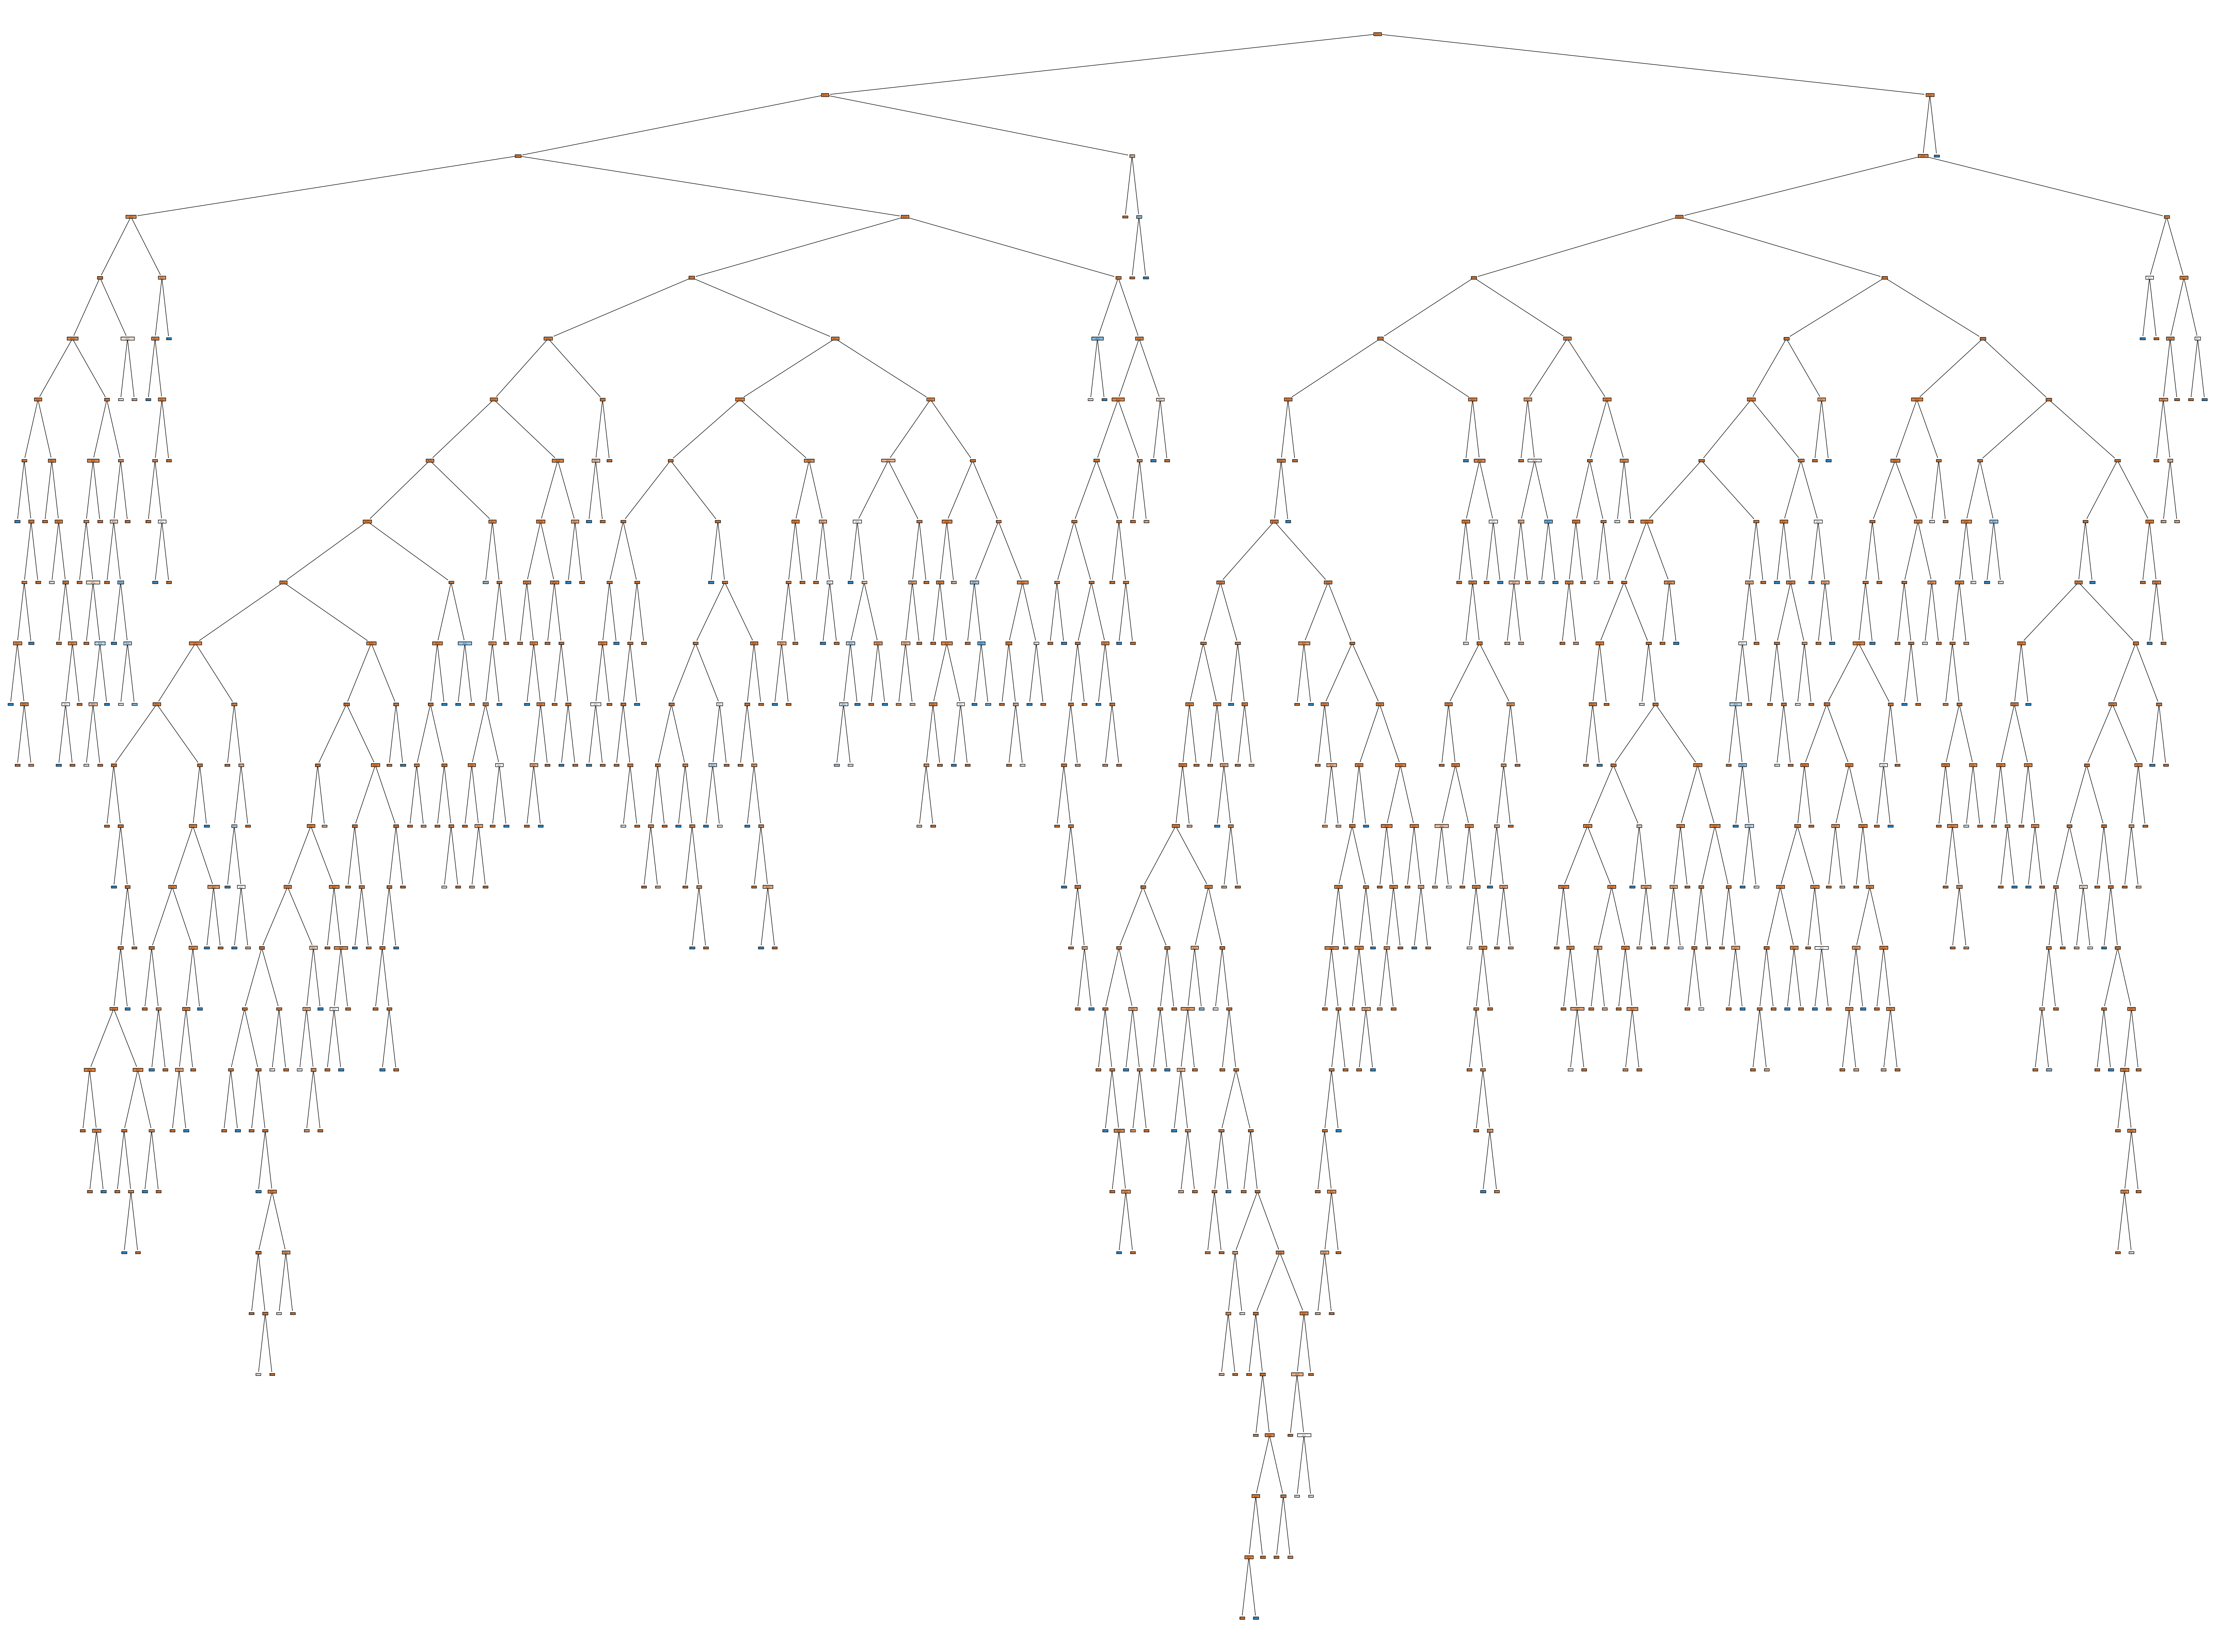

In [49]:
plt.figure(figsize=(80,60))
plot_tree(clf,
         filled=True,
         class_names=['aprovado', 'reprovado'],
         feature_names=X_train.columns);

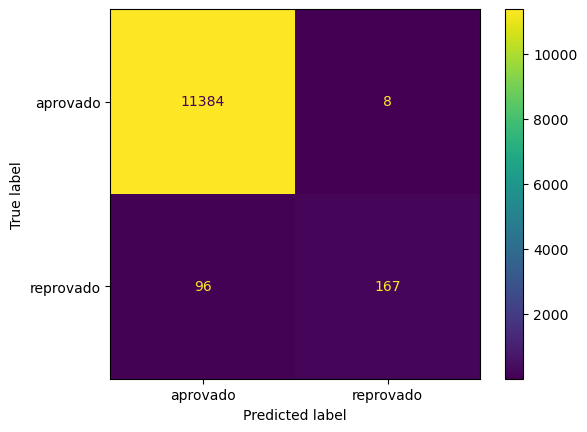

In [50]:
#matriz de confusão

ConfusionMatrixDisplay.from_estimator(clf, X_train,y_train, display_labels=['aprovado', 'reprovado']);
plt.show()

In [51]:
# acurácia de treino

predict_train = clf.predict(X_train)
accuracy_score(y_train, predict_train)

0.991076791076791

#### 3) Vamos avaliar o modelo na base de testes

1. Classifique a base de teste de acordo com a árvore que você treinou no item 2.
2. Produza a visualização da matriz de confusão para a base de teste.
3. Calcule a acurácia da base de teste. Compare com a acurácia da base de treinamento.
4. Treine uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10. Use o random_state = 123. Avalie a matriz de classificação. Observe a distribuição da predição - qual a proporção de proponentes foram classificados como 'maus'?
5. Como ficaria a acurácia se você classificasse todos os contratos como 'bons'?

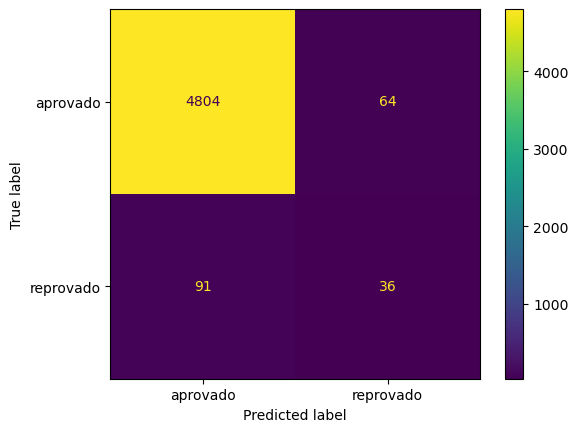

In [52]:
ConfusionMatrixDisplay.from_estimator(clf, X_test,y_test, display_labels=['aprovado', 'reprovado']);
plt.show()

In [53]:
# acurácia de teste

predict_test = clf.predict(X_test)
accuracy_score(y_test, predict_test)

0.968968968968969

As acurácias de treino e teste estão altas, porém parecidas. 

In [54]:
#nova árvore

clf1 = DecisionTreeClassifier(max_depth=10, min_samples_leaf=5, random_state=123)
clf1 = clf1.fit(X_train, y_train)

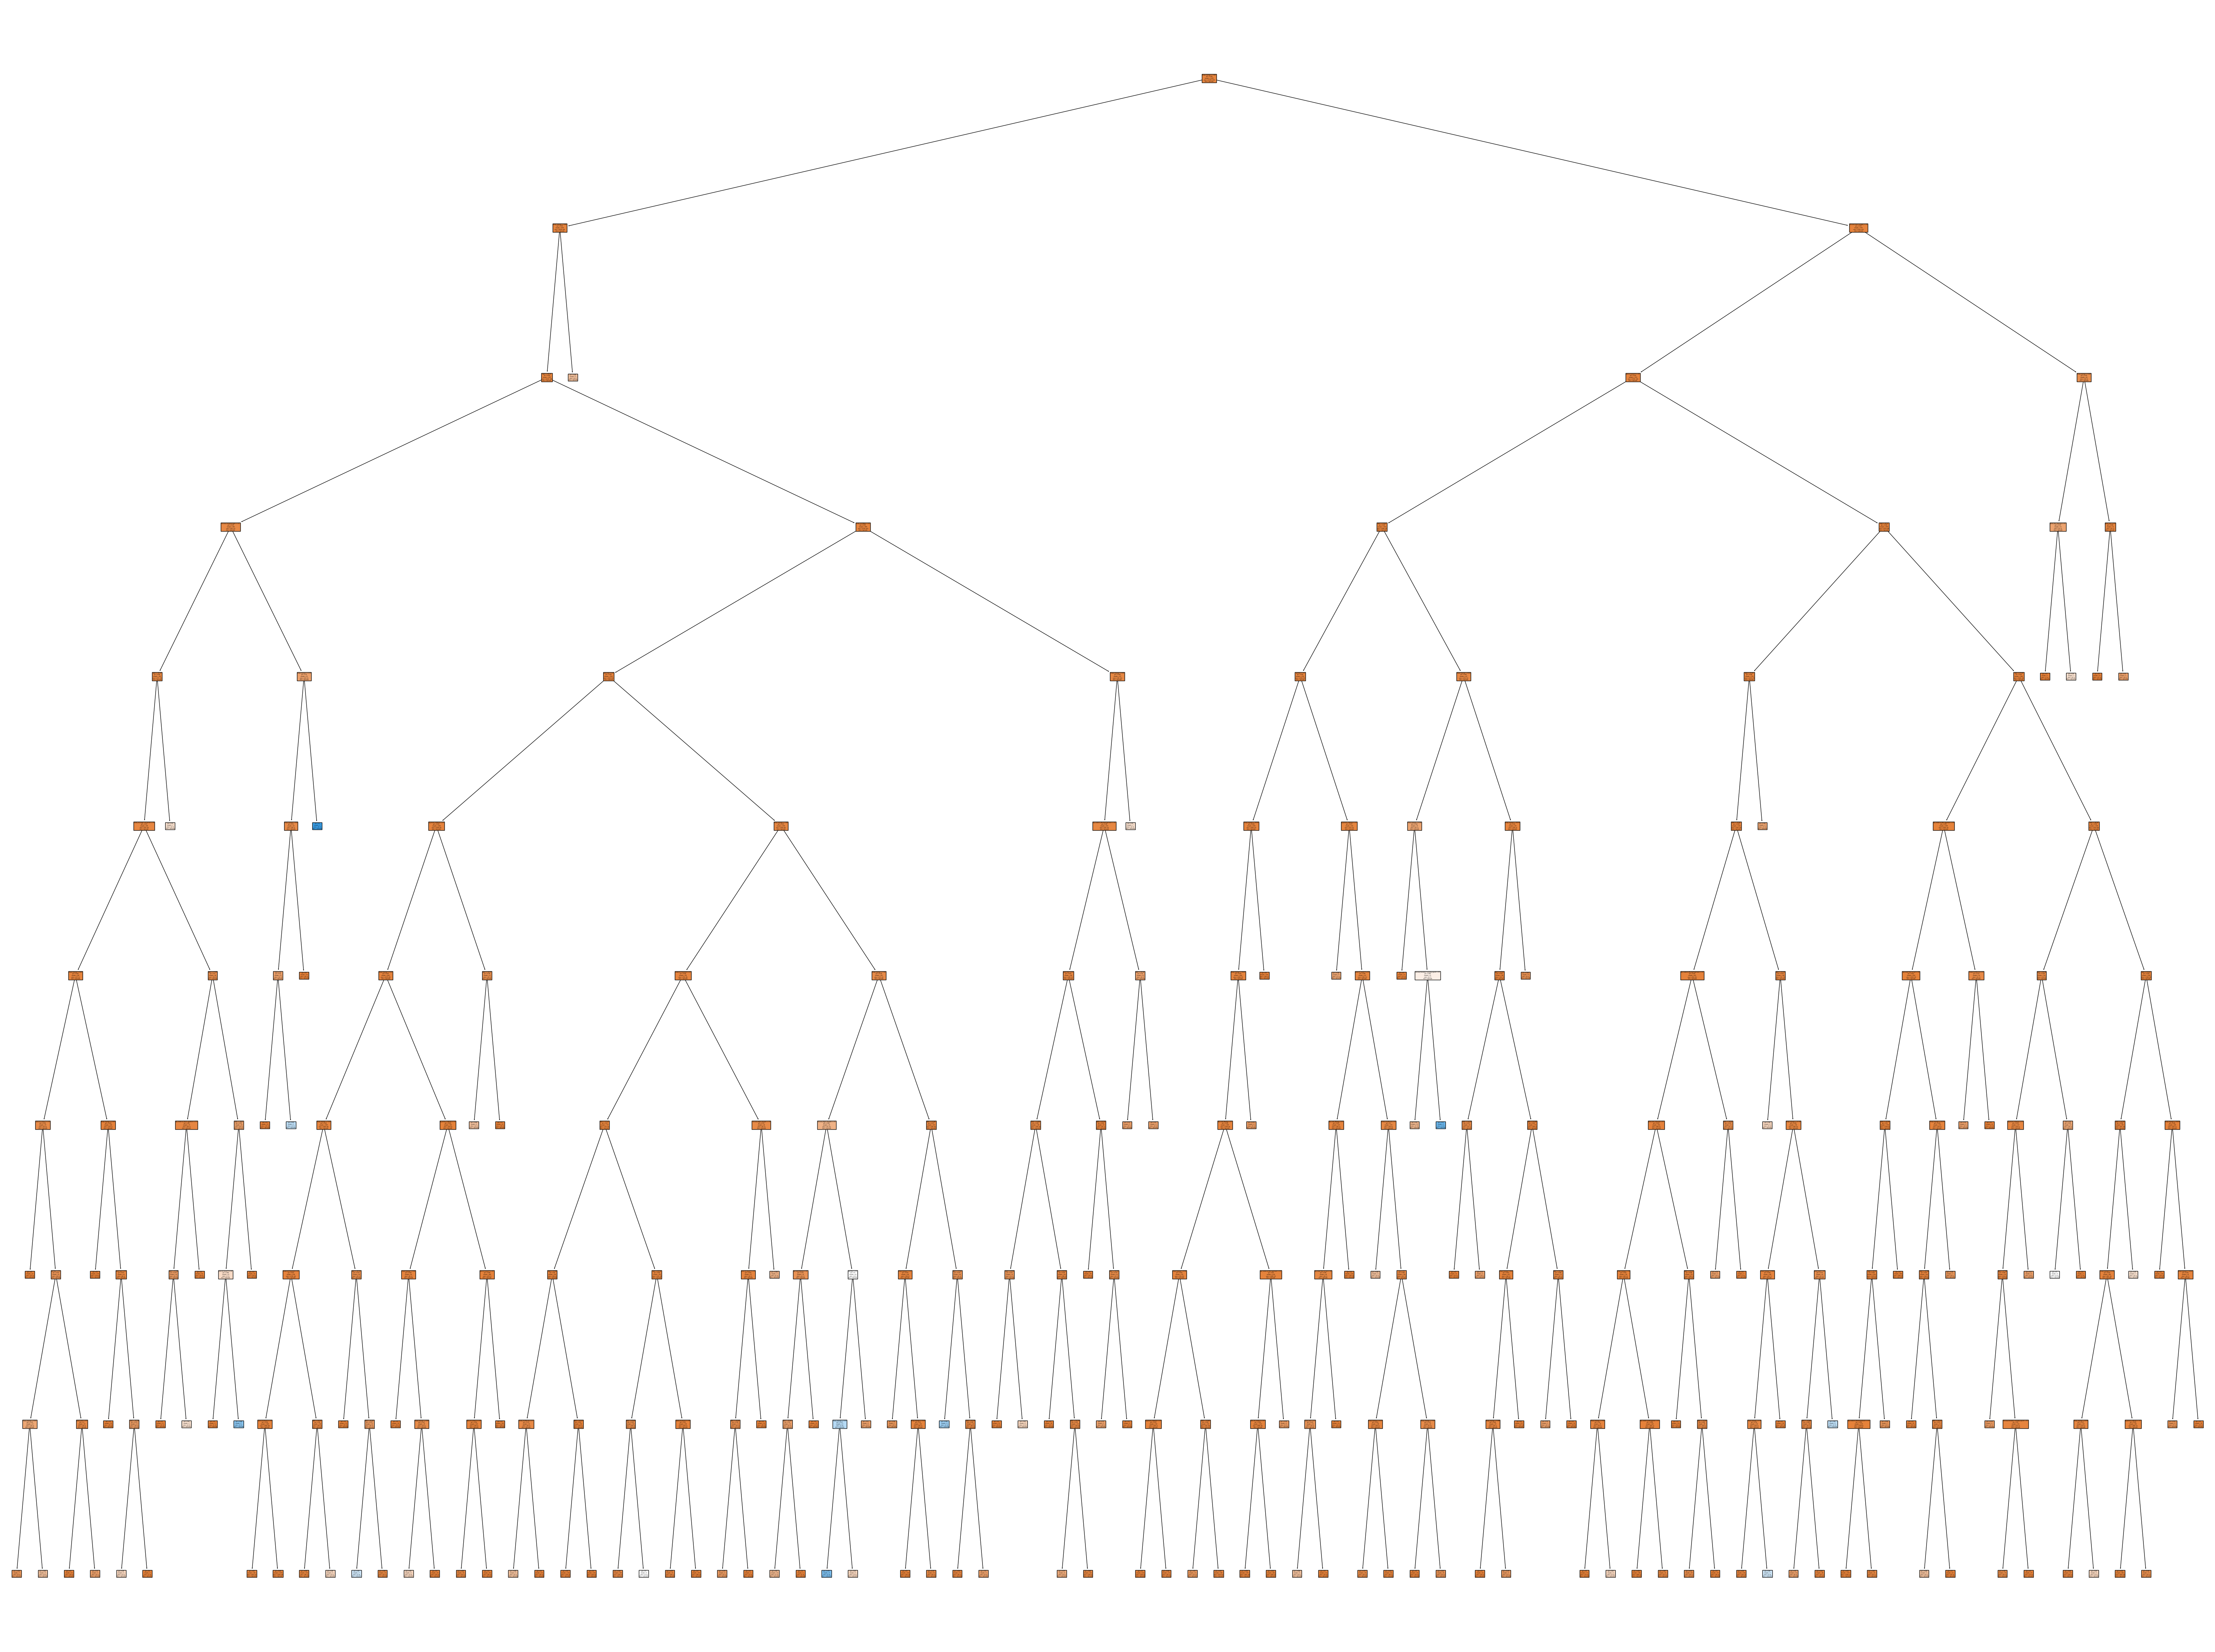

In [55]:
plt.figure(figsize=(80,60))
plot_tree(clf1,
         filled=True,
         class_names=['aprovado', 'reprovado'],
         feature_names=X_train.columns);

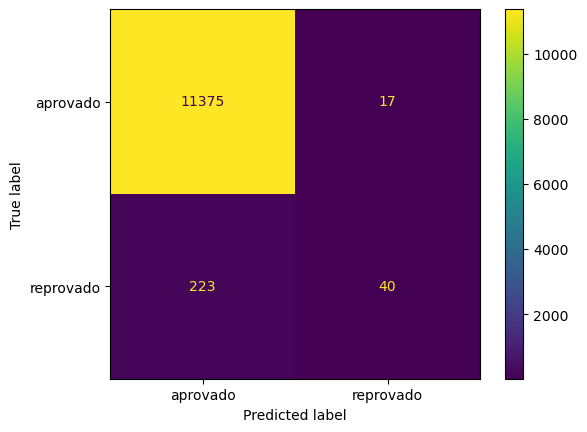

In [56]:
#matriz de confusão

ConfusionMatrixDisplay.from_estimator(clf1, X_train,y_train, display_labels=['aprovado', 'reprovado']);
plt.show()

In [61]:
# acurácia de treino

predict_train1 = clf1.predict(X_train)
accuracy_score(y_train, predict_train1)

0.9794079794079794

In [62]:
X_train.shape

(11655, 28)

In [63]:
# proporção de proponentes foram classificados como 'maus'

maus = (40+17)/11655
maus

0.004890604890604891

proporção de proponentes foram classificados como 'maus' = 0,4%

In [64]:
# acurácia se você classificasse todos os contratos como 'bons'

acuracia_bons = (11375+17)/11655
acuracia_bons

0.9774345774345774